In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data:
huron= pd.read_csv('Lakehuron.csv', index_col=0)
huron.index = pd.to_datetime(huron.index)
# the parameter index_col = 0 means that the first column of the datafile will be used to index the rows
# the second line of command transforms the index column (with dates) into a DateTime format (format to manage dates in Python)

In [3]:
# examine the loaded data: 
huron

,Level
1891-01-31,579.14
1892-01-31,579.16
1893-01-31,579.55
1894-01-31,579.67
1895-01-31,578.44
...,...
1968-01-31,578.52
1969-01-31,579.74
1970-01-31,579.31
1971-01-31,579.89


In [4]:
huron.shape 
# Nous obtenons alors 82 points.

(82, 1)

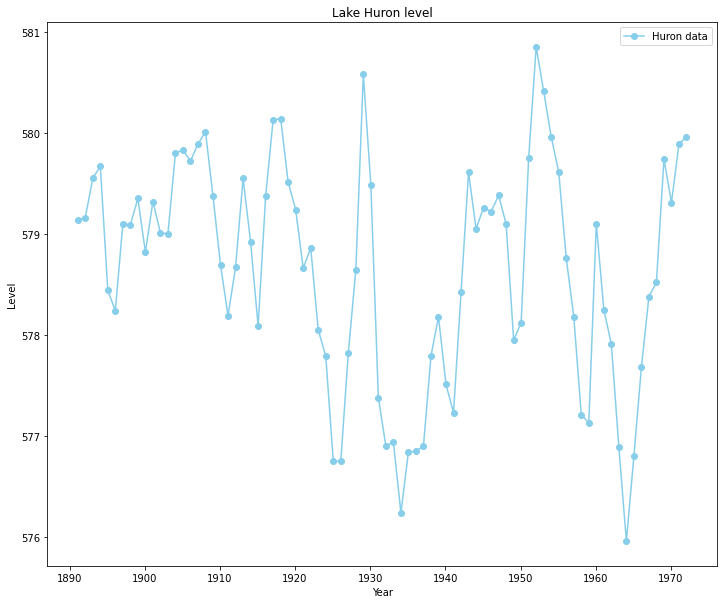

In [5]:
# We will now plot this time series:
plt.figure(figsize=(12, 10)) # creates a figure with the desired size
plt.plot(huron, marker = 'o', color = 'skyblue', label = 'Huron data') # plots the data in the variable huron (by default, index is used for the x-axis and the values for the y-axis).
# marker is used to define how the points will be depicted (you can try something else). You can also change
# the color. The label is the name that you give to the curve (this name will be used in the legend)
plt.title("Lake Huron level") # gives a title to the figure
plt.xlabel("Year") # gives a label to the x-axis
plt.ylabel("Level")# gives a label to the y-axis
plt.legend(loc = 'best') # inserts a legend at the best location

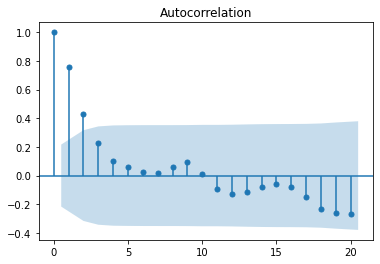

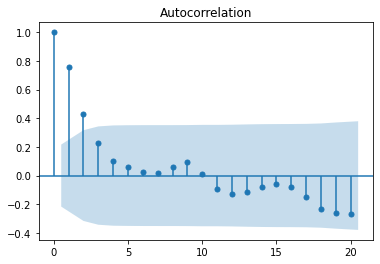

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(huron)

In [9]:
huron_train = huron.iloc[:71,:] # ':71' means rows from the first up to 71 excluded (so 0,1,2,3,...,70) and ':' after the coma means all columns of the dataframe (just one here)
huron_valid = huron.iloc[71:,:] # '71:' means rows from 71 (included) up to the end

# More generally, if df is a dataframe, 
# the command df.iloc[i,j] gets the value at the row number i (starting from 0) and column j (starting from 0)
# the command df.loc[i,j]  gets the value at the row whose index is i and column whose index is j
# with huron for instance, I can get the value at the year 1900 by
# huron.loc['1900-01-31', 'Level']


In [10]:
huron_train = huron.iloc[:71,:]
huron_valid = huron.iloc[71:,:]
huron_train.shape # On obtient bien 71 valeurs
huron_valid.shape # On obtient bien 11 valeurs

(11, 1)

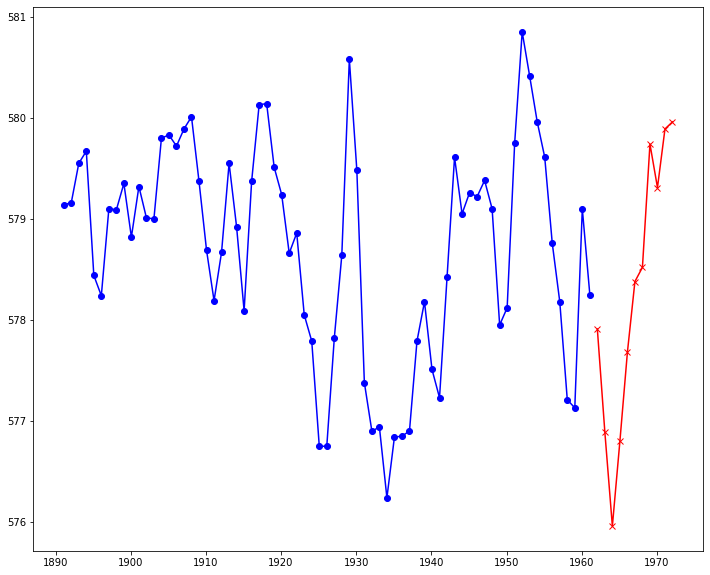

In [11]:
plt.figure(figsize=(12, 10)) # creates a figure with the desired size
plt.plot(huron_train, marker = 'o', color = 'blue', label = 'Huron data')
plt.plot(huron_valid, marker = 'x', color = 'red', label = 'Huron data')

## First method : prediction is the last observed value

In [21]:
huron_train.loc["1961"]
#Comme l'année 1961 a la valeur 578.25, alors l"année 1962 aura la valeur 578.25

,Level
1961-01-31,578.25


In [22]:
# pred_lp = np.repeat(578.25,11)
# pred_lp = np.repeat(huron_train.loc["1961"],11)
pred_lp = np.repeat(huron_train.iloc[-1,0],len(huron_valid))
pred_lp

array([578.25, 578.25, 578.25, 578.25, 578.25, 578.25, 578.25, 578.25,
       578.25, 578.25, 578.25])

In [23]:
pd.DataFrame(pred_lp, index=huron_valid.index, columns=['Level'])

,Level
1962-01-31,578.25
1963-01-31,578.25
1964-01-31,578.25
1965-01-31,578.25
1966-01-31,578.25
1967-01-31,578.25
1968-01-31,578.25
1969-01-31,578.25
1970-01-31,578.25
1971-01-31,578.25


In [24]:
pred_lp = pd.DataFrame(pred_lp, index=huron_valid.index, columns=['Level'])

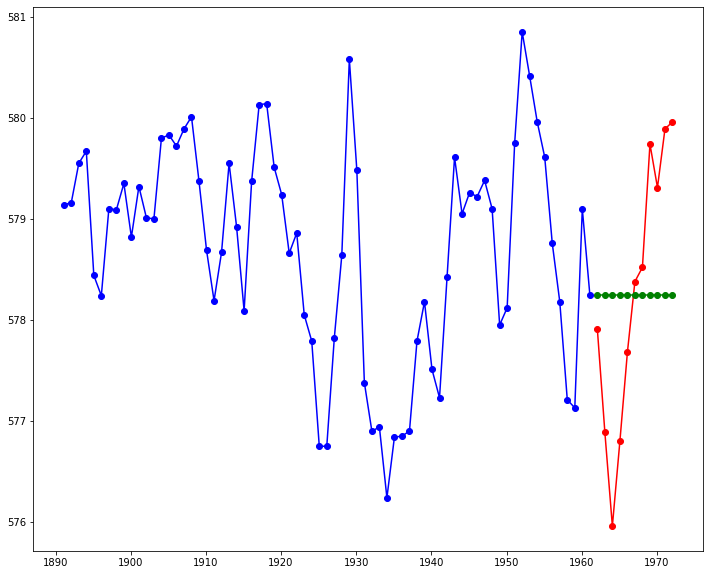

In [25]:
plt.figure(figsize=(12, 10)) # creates a figure with the desired size
plt.plot(huron_train, marker = 'o', color = 'blue', label = 'Huron train')
plt.plot(huron_valid, marker = 'o', color = 'red', label = 'Huron validation')
plt.plot(pred_lp, marker = 'o', color = 'green', label = 'Huron pred')

In [26]:
MSE=(huron_valid.loc["1962"]-pred_lp.loc["1962"])**2
MSE

,Level
1962-01-31,0.1156


In [27]:
np.mean((pred_lp - huron_valid)**2)
# here we compare the predictions in pred_lp with the true values (in huron_valid) with a substraction, square the errors
# and get the mean (with np.mean)

Level    1.698536
dtype: float64

## Second method : prediction is the mean of all past observed values

In [28]:
np.mean(huron_train)

Level    578.710845
dtype: float64

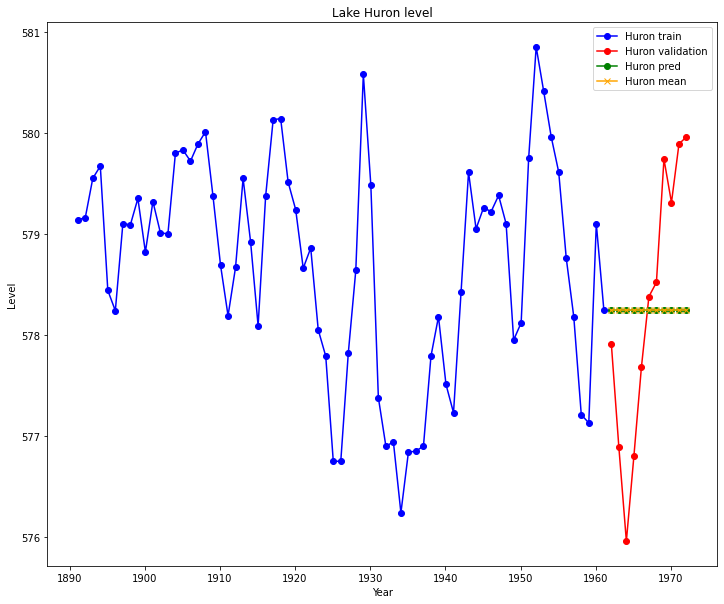

In [29]:
pred_mean = np.repeat(np.mean(huron_train),len(huron_valid))
pred_mean = pd.DataFrame(pred_lp, index=huron_valid.index, columns=['Level'])
plt.figure(figsize=(12, 10))
plt.plot(huron_train, marker = 'o', color = 'blue', label = 'Huron train')
plt.plot(huron_valid, marker = 'o', color = 'red', label = 'Huron validation')
plt.plot(pred_lp, marker = 'o', color = 'green', label = 'Huron pred')
plt.plot(pred_mean, marker = 'x', color = 'orange', label = 'Huron mean')
plt.title("Lake Huron level") # gives a title to the figure
plt.xlabel("Year") # gives a label to the x-axis
plt.ylabel("Level")# gives a label to the y-axis
plt.legend(loc = 'best') # inserts a legend at the best location

## Simple exponential smoothing

In [30]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
ses_model = SimpleExpSmoothing(huron_train).fit(smoothing_level=0.5, initial_level=579)
# Here I ask to use alpha = 0.5 (smoothing level) and xhat_0 = 579 (prediction of the value x_0, initial level)
# We will see a bit later how to ask the algorithm to search for the best values of these parameters
ses_model.summary()

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-JAN will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1099: FutureWarning: Setting initial values during fit is deprecated and will be removed after 0.13. These should be set during model initialization.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:830: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  warnings.warn(message, EstimationWarning)


Dep. Variable:,Level,No. Observations:,71
Model:,SimpleExpSmoothing,SSE,51.923
Optimized:,False,AIC,-18.217
Trend:,None,BIC,-13.692
Seasonal:,None,AICC,-17.611
Seasonal Periods:,None,Date:,"Thu, 08 Apr 2021"
Box-Cox:,False,Time:,13:29:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,579.00000,l.0,False


In [31]:
ses_model.fittedvalues

1891-01-31    579.000000
1892-01-31    579.070000
1893-01-31    579.115000
1894-01-31    579.332500
1895-01-31    579.501250
                 ...    
1957-01-31    579.299895
1958-01-31    578.739947
1959-01-31    577.974974
1960-01-31    577.552487
1961-01-31    578.326243
Length: 71, dtype: float64

In [32]:
xhat_1 = 0.5*huron_train.loc["1891"]+(1-0.5)*579
xhat_1 = xhat_1.iloc[0,0]
xhat_1

579.0699999999999

In [33]:
xhat_2=0.5*huron_train.loc["1892"]+(1-0.5)*xhat_1
xhat_2 = xhat_2.iloc[0,0]
xhat_2

579.115

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-JAN will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:830: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  warnings.warn(message, EstimationWarning)


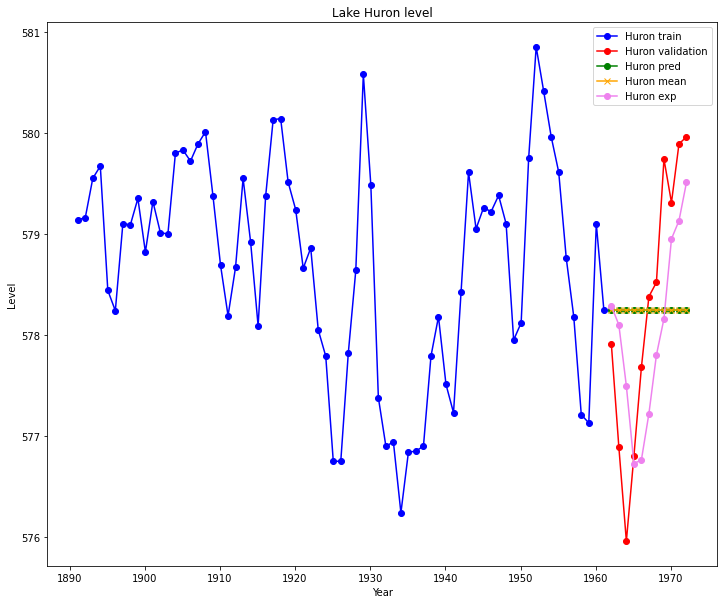

In [34]:
ses_model = SimpleExpSmoothing(huron).fit(smoothing_level=0.5, initial_level=579)
pred_exp = pd.DataFrame(ses_model.fittedvalues, index=huron.index, columns=['Level'])
pred_exp = pred_exp.iloc[71:,:]
pred_exp = pd.DataFrame(pred_exp, index=huron_valid.index, columns=['Level'])
plt.figure(figsize=(12, 10))
plt.plot(huron_train, marker = 'o', color = 'blue', label = 'Huron train')
plt.plot(huron_valid, marker = 'o', color = 'red', label = 'Huron validation')
plt.plot(pred_lp, marker = 'o', color = 'green', label = 'Huron pred')
plt.plot(pred_mean, marker = 'x', color = 'orange', label = 'Huron mean')
plt.plot(pred_exp, marker = 'o', color = 'violet', label = 'Huron exp')
plt.title("Lake Huron level") # gives a title to the figure
plt.xlabel("Year") # gives a label to the x-axis
plt.ylabel("Level")# gives a label to the y-axis
plt.legend(loc = 'best') # inserts a legend at the best location

In [35]:
ses_model_2 = SimpleExpSmoothing(huron_train).fit()
# here we do not put any desired values for alpha and the initial level which means that the algorithm will search for the best ones
ses_model_2.summary()

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-JAN will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,Level,No. Observations:,71
Model:,SimpleExpSmoothing,SSE,41.330
Optimized:,True,AIC,-34.418
Trend:,None,BIC,-29.893
Seasonal:,None,AICC,-33.812
Seasonal Periods:,None,Date:,"Thu, 08 Apr 2021"
Box-Cox:,False,Time:,13:29:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,579.14022,l.0,True


In [36]:
print('Alpha :',ses_model_2.params['smoothing_level'])
print('xhat_0 :', ses_model_2.params['initial_level'])
alpha = ses_model_2.params['smoothing_level']
alpha
xhat_0 = ses_model_2.params['initial_level']
xhat_0

Alpha : 0.9999999850983017
xhat_0 : 579.1402183914184


579.1402183914184

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-JAN will be used.
  warnings.warn('No frequency information was'


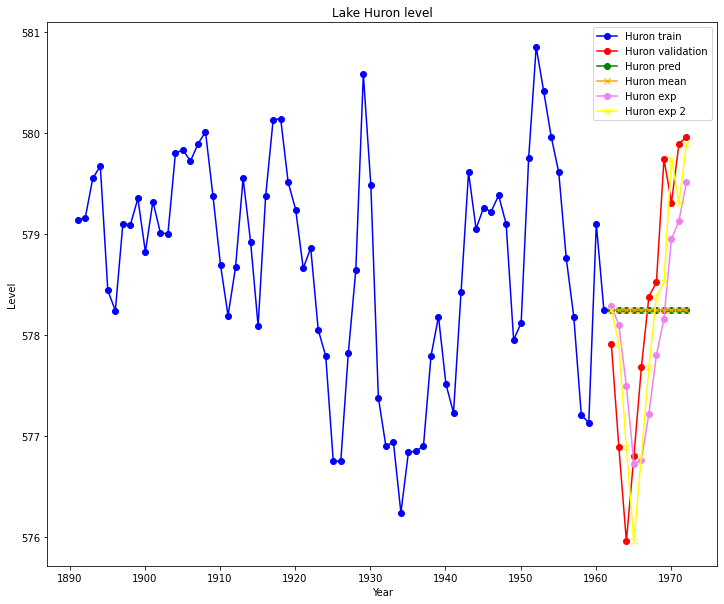

In [37]:
ses_model_2 = SimpleExpSmoothing(huron).fit()
pred_exp_2 = pd.DataFrame(ses_model_2.fittedvalues, index=huron.index, columns=['Level'])
pred_exp_2 = pred_exp_2.iloc[71:,:]
pred_exp_2 = pd.DataFrame(pred_exp_2, index=huron_valid.index, columns=['Level'])
plt.figure(figsize=(12, 10))
plt.plot(huron_train, marker = 'o', color = 'blue', label = 'Huron train')
plt.plot(huron_valid, marker = 'o', color = 'red', label = 'Huron validation')
plt.plot(pred_lp, marker = 'o', color = 'green', label = 'Huron pred')
plt.plot(pred_mean, marker = 'x', color = 'orange', label = 'Huron mean')
plt.plot(pred_exp, marker = 'o', color = 'violet', label = 'Huron exp')
plt.plot(pred_exp_2, marker = 'x', color = 'yellow', label = 'Huron exp 2')
plt.title("Lake Huron level") # gives a title to the figure
plt.xlabel("Year") # gives a label to the x-axis
plt.ylabel("Level")# gives a label to the y-axis
plt.legend(loc = 'best') # inserts a legend at the best location

In [38]:
ses_model_2.fittedvalues

1891-01-31    579.140217
1892-01-31    579.140000
1893-01-31    579.160000
1894-01-31    579.550000
1895-01-31    579.670000
                 ...    
1968-01-31    578.380000
1969-01-31    578.520000
1970-01-31    579.740000
1971-01-31    579.310000
1972-01-31    579.890000
Length: 82, dtype: float64

In [41]:
xhat_n=alpha*huron_valid.loc["1972"]+(1-alpha)*huron_valid.loc["1971"]
#xhat_n = xhat_n.iloc[0,0]
xhat_n

,Level
1971-01-31,NaN
1972-01-31,NaN


In [42]:
ses_model_2.forecast(10)

1973-01-31    579.96
1974-01-31    579.96
1975-01-31    579.96
1976-01-31    579.96
1977-01-31    579.96
1978-01-31    579.96
1979-01-31    579.96
1980-01-31    579.96
1981-01-31    579.96
1982-01-31    579.96
Freq: A-JAN, dtype: float64

## Auto-regressive models

In [43]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(huron_train, lags = 1, trend = 'c').fit()
ar_model.summary()
# the parameter lags is used to define the order of the AR model you want
# trend = 'c' means that we want a constant (beta_0) in the model

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-JAN will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Level   No. Observations:                   71
Model:                     AutoReg(1)   Log Likelihood                 -76.025
Method:               Conditional MLE   S.D. of innovations              0.717
Date:                Thu, 08 Apr 2021   AIC                             -0.580
Time:                        13:31:51   BIC                             -0.484
Sample:                    01-31-1892   HQIC                            -0.542
                         - 01-31-1961                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    149.8478     46.463      3.225      0.001      58.782     240.913
Level.L1       0.7410      0.080      9.230      0.000       0.584       0.898
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3494           +0.0000j            1.3494            0.0000
-----------------------------------------------------------------------------
"""

In [44]:
ar_model.params

intercept    149.847758
Level.L1       0.741047
dtype: float64

In [30]:
ar_model.forecast(1) # 1 here means 1 time instant after the last value of the training data

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


1962-01-31    578.358328
Freq: A-JAN, dtype: float64

In [31]:
ar_model.bic
# The lower is this value, the better is the fit of the model to the training data

-0.48366674531703335